In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from Gonzales import Gonzales

In [3]:
DATA_PATH = "data"

In [4]:
os.listdir(DATA_PATH)

['Team_Attributes.csv',
 'Player.csv',
 'Match.csv',
 'League.csv',
 'Country.csv',
 'Player_Attributes.csv',
 'Team.csv']

In [6]:
player_attr_raw = pd.read_csv(os.path.join(DATA_PATH, 'Player_Attributes.csv'))
player_attr_raw.shape

(183978, 42)

In [7]:
player_attr = player_attr_raw.dropna()
player_attr.shape

(180354, 42)

In [8]:
unique_foot = player_attr['preferred_foot'].unique()


In [9]:

unqiue_off_rate = player_attr['attacking_work_rate'].unique()


In [10]:

unqiue_def_rate = player_attr['defensive_work_rate'].unique()

In [11]:
player_attr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 42 columns):
id                     180354 non-null int64
player_fifa_api_id     180354 non-null int64
player_api_id          180354 non-null int64
date                   180354 non-null object
overall_rating         180354 non-null float64
potential              180354 non-null float64
preferred_foot         180354 non-null object
attacking_work_rate    180354 non-null object
defensive_work_rate    180354 non-null object
crossing               180354 non-null float64
finishing              180354 non-null float64
heading_accuracy       180354 non-null float64
short_passing          180354 non-null float64
volleys                180354 non-null float64
dribbling              180354 non-null float64
curve                  180354 non-null float64
free_kick_accuracy     180354 non-null float64
long_passing           180354 non-null float64
ball_control           180354 non-null float64
accele

In [12]:
vectorized_players_df = player_attr.drop(columns=['id','player_fifa_api_id',
                                               'player_api_id', 'date', 
                                               'preferred_foot', 'attacking_work_rate',
                                               'defensive_work_rate', 'overall_rating',
                                            'potential'])

In [13]:
vectorized_players_df.shape

(180354, 33)

In [27]:
description = vectorized_players_df.describe()
vectorized_players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 33 columns):
crossing              180354 non-null float64
finishing             180354 non-null float64
heading_accuracy      180354 non-null float64
short_passing         180354 non-null float64
volleys               180354 non-null float64
dribbling             180354 non-null float64
curve                 180354 non-null float64
free_kick_accuracy    180354 non-null float64
long_passing          180354 non-null float64
ball_control          180354 non-null float64
acceleration          180354 non-null float64
sprint_speed          180354 non-null float64
agility               180354 non-null float64
reactions             180354 non-null float64
balance               180354 non-null float64
shot_power            180354 non-null float64
jumping               180354 non-null float64
stamina               180354 non-null float64
strength              180354 non-null float64
long_shots     

In [16]:
vectorized_players = vectorized_players_df.values

# Gonzales Clustering

In [61]:
clusters, three_cen_cost, three_mean_cost, centers = Gonzales(vectorized_players, vectorized_players[0,:], k=3)

204.39178065665948 102.52962266996589
[[49. 44. 71. 61. 44. 51. 45. 39. 64. 49. 60. 64. 59. 47. 65. 55. 58. 54.
  76. 35. 71. 70. 45. 54. 48. 65. 69. 69.  6. 11. 10.  8.  8.]
 [ 9. 10.  8. 23.  7.  9.  8. 88. 76. 22. 62. 44. 65. 89. 67. 24. 75. 56.
  83.  9. 81. 90. 14. 70. 88.  8.  8.  9. 91. 93. 76. 96. 93.]
 [ 6.  9.  7.  5.  4.  4.  6.  1.  7.  7. 25. 21. 54. 28. 44.  5. 58. 23.
  63.  2. 12.  4.  5.  6.  7.  6.  6. 11. 49. 42. 43. 49. 51.]]


In [62]:
clusters.shape

(180354, 34)

In [63]:
centers

array([[49., 44., 71., 61., 44., 51., 45., 39., 64., 49., 60., 64., 59.,
        47., 65., 55., 58., 54., 76., 35., 71., 70., 45., 54., 48., 65.,
        69., 69.,  6., 11., 10.,  8.,  8.],
       [ 9., 10.,  8., 23.,  7.,  9.,  8., 88., 76., 22., 62., 44., 65.,
        89., 67., 24., 75., 56., 83.,  9., 81., 90., 14., 70., 88.,  8.,
         8.,  9., 91., 93., 76., 96., 93.],
       [ 6.,  9.,  7.,  5.,  4.,  4.,  6.,  1.,  7.,  7., 25., 21., 54.,
        28., 44.,  5., 58., 23., 63.,  2., 12.,  4.,  5.,  6.,  7.,  6.,
         6., 11., 49., 42., 43., 49., 51.]])

In [64]:
ranking_wgt_vector = np.array([
    -1,-1,-1,-1,-1,
    0,0,0,0,0,
    0,0,0,0,0,
    0,0,0,0,0,
    -1,1,1,0,-1,
    1,1,1,
    2,2,2,2,2,
])
ranking_wgt_vector.shape

(33,)

In [65]:
ranks = np.dot(vectorized_players, ranking_wgt_vector)


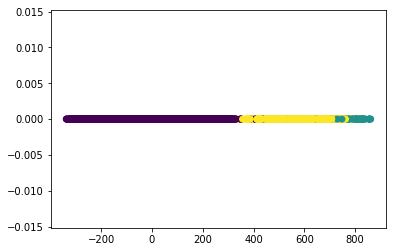

In [66]:
plt.scatter(list(ranks), [0]*len(ranks),c=clusters[:,-1])
plt.show()